In [99]:
import re
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
pd.set_option('display.max_columns', None)  


# Data Description

In [100]:
data_train = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")
data_train.head()

,unique_hash,text,drug,sentiment
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,"Autoimmune diseases tend to come in clusters. As for Gilenya – if you feel good, don’t think about it, it won’t change anything but waste your time and energy. I’m taking Tysabri and feel amazing, no symptoms (other than dodgy color vision, but I’ve had it since always, so, don’t know) and I don’t know if it will last a month, a year, a decade, ive just decided to enjoy the ride, no point in worrying.",gilenya,2
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,"I can completely understand why you’d want to try it. But, results reported in lectures don’t always stand up to the scrutiny of peer-review during publication. There so much still to do before this is convincing. I hope that it does work out, I really do. And if you’re aware of and happy with the risks, then that’s great. I just think it’s important to present this in a balanced way, and to understand why we don’t move straight from the first show of promise in an animal study to using drugs on humans. There’s still a lot of animal data to gather, and human data to gather before anyone can tell if it’s safe or effective. I can’t tell you how many times animal studies don’t follow through to humans, but it’s one of the major attrition points in drug development. You’ve been through some of the unpredictability issues with Cladribine/Gilenya, where there was an interaction that wasn’t predicted. But once people try it, the doctors can see patterns and work out what’s going on. Clemastine/metformin is very exciting, and given what you’ve said about your current condition and your personal risk tolerance it makes sense to try it. It definitely wouldn’t be for everyone.",gilenya,2
2,fe809672251f6bd0d986e00380f48d047c7e7b76,"Interesting that it only targets S1P-1/5 receptors rather than 1-5 like Fingolimod. Hoping to soon see what the AEs and SAEs were Yes. I'm not sure what this means, exactly: Quote Nine patients reported serious adverse events (2 mg: 3/29 [10.3%], 1.25 mg: 1/43 [2.3%], 0.5 mg: 4/29 [13.8%], and 0.25 mg: 1/50 [2.0%]; no serious adverse event was reported for more than 1 patient and no new safety signals occurred compared with the BOLD Study. If there were 9 patients reporting SAEs, how can it be stated that ""no serious adverse event was reported for more than 1 patient...""? Maybe I haven't read this right, or maybe there's a misprint. I'm very pleased that something is being developed for SPMS, and it's encouraging that siponimod doesn't linger for very long in the body.",fingolimod,2
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder where lemtrada and ocrevus sales would go, if they prove anti-cd20 are induction",ocrevus,2
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain and Cervical Cord are in and my next Neurologist appointment is in the next couple of weeks. There’re no new lesions in Brain/Cord and I’ve had no relapses while I was on Gilenya. This was a good sign. But there was one line in the cervical cord review that concerned me. It goes : “Lesions at C2-3 and T2 now show hypointensity on the post gadolinium T1 images only. This could represent artifact or early axonal loss.” That was bothersome to read. What are the kind of symptoms from C2-C3 lesion should I be aware of ? Would it result in change of my DMT ? Thanks.",gilenya,1


In [101]:
data_train.shape

(5279, 4)

In [102]:
data_test.shape

(2924, 3)

In [103]:
data_train.isnull().sum()

unique_hash    0
text           0
drug           0
sentiment      0
dtype: int64

In [105]:
combined = data_train.append(data_test, ignore_index=True)
len(combined)


8203

In [106]:
combined["drug"].unique()


array(['gilenya', 'fingolimod', 'ocrevus', 'cladribine', 'humira',
       'tagrisso', 'lucentis', 'pan-retinal photocoagulation', 'remicade',
       'stelara', 'ocrelizumab', 'dexamethasone', 'pemetrexed', 'cimzia',
       'tarceva', 'nivolumab', 'tecentriq', 'ipilimumab', 'mekinist',
       'opdivo', 'dexamethasone implant', 'eylea', 'erlotinib',
       'alectinib', 'entyvio', 'crizotinib', 'keytruda', 'mavenclad',
       'osimertinib', 'vedolizumab', 'atezolizumab', 'durvalumab',
       'alimta', 'tysabri', 'avastin', 'golimumab', 'tofacitinib',
       'ixifi', 'teriflunomide', 'ranibizumab', 'afatinib',
       'upadacitinib', 'zykadia', 'ustekinumab', 'xalkori',
       'pembrolizumab', 'lemtrada', 'siponimod', 'simponi', 'inflectra',
       'entrectinib', 'yervoy', 'vitrectomy', 'bevacizumab', 'gefitinib',
       'amjevita', 'lorlatinib', 'pemrolizumab', 'tafinlar',
       'infliximab-dyyb', 'ozurdex', 'gilotrif', 'imfinzi', 'iressa',
       'laser photocoagulation', 'renflexis', 'a

In [107]:
pd.options.display.max_colwidth = 3000
data_train.head()

,unique_hash,text,drug,sentiment
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,"Autoimmune diseases tend to come in clusters. As for Gilenya – if you feel good, don’t think about it, it won’t change anything but waste your time and energy. I’m taking Tysabri and feel amazing, no symptoms (other than dodgy color vision, but I’ve had it since always, so, don’t know) and I don’t know if it will last a month, a year, a decade, ive just decided to enjoy the ride, no point in worrying.",gilenya,2
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,"I can completely understand why you’d want to try it. But, results reported in lectures don’t always stand up to the scrutiny of peer-review during publication. There so much still to do before this is convincing. I hope that it does work out, I really do. And if you’re aware of and happy with the risks, then that’s great. I just think it’s important to present this in a balanced way, and to understand why we don’t move straight from the first show of promise in an animal study to using drugs on humans. There’s still a lot of animal data to gather, and human data to gather before anyone can tell if it’s safe or effective. I can’t tell you how many times animal studies don’t follow through to humans, but it’s one of the major attrition points in drug development. You’ve been through some of the unpredictability issues with Cladribine/Gilenya, where there was an interaction that wasn’t predicted. But once people try it, the doctors can see patterns and work out what’s going on. Clemastine/metformin is very exciting, and given what you’ve said about your current condition and your personal risk tolerance it makes sense to try it. It definitely wouldn’t be for everyone.",gilenya,2
2,fe809672251f6bd0d986e00380f48d047c7e7b76,"Interesting that it only targets S1P-1/5 receptors rather than 1-5 like Fingolimod. Hoping to soon see what the AEs and SAEs were Yes. I'm not sure what this means, exactly: Quote Nine patients reported serious adverse events (2 mg: 3/29 [10.3%], 1.25 mg: 1/43 [2.3%], 0.5 mg: 4/29 [13.8%], and 0.25 mg: 1/50 [2.0%]; no serious adverse event was reported for more than 1 patient and no new safety signals occurred compared with the BOLD Study. If there were 9 patients reporting SAEs, how can it be stated that ""no serious adverse event was reported for more than 1 patient...""? Maybe I haven't read this right, or maybe there's a misprint. I'm very pleased that something is being developed for SPMS, and it's encouraging that siponimod doesn't linger for very long in the body.",fingolimod,2
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder where lemtrada and ocrevus sales would go, if they prove anti-cd20 are induction",ocrevus,2
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain and Cervical Cord are in and my next Neurologist appointment is in the next couple of weeks. There’re no new lesions in Brain/Cord and I’ve had no relapses while I was on Gilenya. This was a good sign. But there was one line in the cervical cord review that concerned me. It goes : “Lesions at C2-3 and T2 now show hypointensity on the post gadolinium T1 images only. This could represent artifact or early axonal loss.” That was bothersome to read. What are the kind of symptoms from C2-C3 lesion should I be aware of ? Would it result in change of my DMT ? Thanks.",gilenya,1


# Data Cleaning

In [108]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'@[a-zA-Z0-9_]+', '', text)   
    text = re.sub(r'https?://[A-Za-z0-9./]+', '', text)   
    text = re.sub(r'www.[^ ]+', '', text)  
    text = re.sub(r'[a-zA-Z0-9]*www[a-zA-Z0-9]*com[a-zA-Z0-9]*', '', text)  
    text = re.sub(r'[^a-zA-Z]', ' ', text)   
    text = [token for token in text.split() if len(token) > 2]
    text = ' '.join(text)
    return text

# combined["text"] = combined["text"].apply(clean_text)

data_train['text'] = data_train['text'].apply(clean_text)
data_test['text'] = data_test['text'].apply(clean_text)

In [79]:
tokenized_review_train = data_train['text'].apply(lambda x: x.split())
tokenized_review_train.head()

0                                                                                                                                                                                                                                                                                                                                                [autoimmune, diseases, tend, come, clusters, for, gilenya, you, feel, good, don, think, about, won, change, anything, but, waste, your, time, and, energy, taking, tysabri, and, feel, amazing, symptoms, other, than, dodgy, color, vision, but, had, since, always, don, know, and, don, know, will, last, month, year, decade, ive, just, decided, enjoy, the, ride, point, worrying]
1    [can, completely, understand, why, you, want, try, but, results, reported, lectures, don, always, stand, the, scrutiny, peer, review, during, publication, there, much, still, before, this, convincing, hope, that, does, work, out, really, and, you, aware, and, happy, with, the, ris

In [109]:
tokenized_review_test = data_test['text'].apply(lambda x: x.split())
tokenized_review_test.head()

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         [previously, stable, natalizumab, with, switching, fingolimod]
1                                                                                                                                                                                                                                                                              

In [110]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_review_train = tokenized_review_train.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_review_train.head()

0                                                                                                                                                                                                                                                                                                                 [autoimmun, disea, tend, come, cluster, for, gilenya, you, feel, good, don, think, about, won, chang, anyth, but, wast, your, time, and, energi, take, tysabri, and, feel, amaz, symptom, other, than, dodgi, color, vision, but, had, sinc, alway, don, know, and, don, know, will, last, month, year, decad, ive, just, decid, enjoy, the, ride, point, worri]
1    [can, complet, understand, whi, you, want, tri, but, result, report, lectur, don, alway, stand, the, scrutini, peer, review, dure, public, there, much, still, befor, thi, convinc, hope, that, doe, work, out, realli, and, you, awar, and, happi, with, the, risk, then, that, great, just, think, import, present, thi, balanc, way, and, und

In [111]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_review_test = tokenized_review_test.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_review_test.head()

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  [previous, stabl, natalizumab, with, switch, fingolimod]
1                                                                                                                                                                                                                                                                                                                                           

# Checking Data Distribution of Dependent Variable

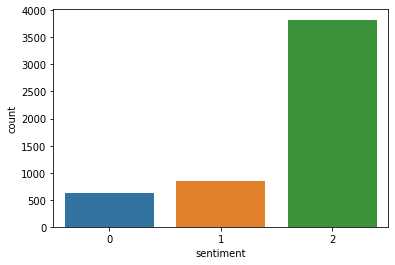

In [112]:
sns.countplot(x='sentiment', data=data_train)

# Model Building

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(data_train['text'], data_train['sentiment'], test_size=0.30, stratify=data_train['sentiment'], 
                                                random_state=1)

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(analyzer='word', stop_words=None, token_pattern='(?u)\\b\\w\\w+\\b', ngram_range=(1, 1), max_df=1.0, 
                             min_df=3, max_features=None, binary=False, norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=False)

In [115]:
X_train_tfidf = tfidf_vect.fit_transform(X_train)
X_validation_tfidf = tfidf_vect.transform(X_validation)

In [116]:
from sklearn.metrics import f1_score, accuracy_score,precision_score, recall_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', max_iter=200, random_state=0, class_weight='balanced')
ovr = OneVsRestClassifier(sgd)
ovr.fit(X_train_tfidf, y_train)
y_pred_class = ovr.predict(X_validation_tfidf)
print('f1_score       :', f1_score(y_validation, y_pred_class, average='macro'))
print('accuracy score :', accuracy_score(y_validation, y_pred_class))
print('recall score :', recall_score(y_validation, y_pred_class,average="macro"))

f1_score       : 0.5032193559786329
accuracy score : 0.6578282828282829
recall score : 0.5185050987937005


# Prediction on Test Data

In [117]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(analyzer='word', stop_words=None, token_pattern='(?u)\\b\\w\\w+\\b', ngram_range=(1, 1), max_df=1.0, 
                             min_df=3, max_features=None, binary=False, norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=False)

In [118]:
full_text = list(data_train['text'].values) + list(data_test['text'].values)
tfidf_vect.fit(full_text)

X_train_tfidf = tfidf_vect.transform(data_train['text'])
X_test_tfidf = tfidf_vect.transform(data_test['text'])

y_train = data_train['sentiment']

In [119]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', max_iter=200, random_state=0, class_weight='balanced')
ovr = OneVsRestClassifier(sgd)
ovr.fit(X_train_tfidf, y_train)
y_pred_class = ovr.predict(X_test_tfidf)
y_pred_class

array([2, 1, 2, ..., 2, 2, 2])

In [120]:
data_test['sentiment'] = y_pred_class
data_test.drop(['text','drug'], axis=1,inplace=True)
data_test.head(5)

,unique_hash,sentiment
0,9e9a8166b84114aca147bf409f6f956635034c08,2
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,1
2,50b6d851bcff4f35afe354937949e9948975adf7,2
3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,2
4,8b37d169dee5bdae27060949242fb54feb6a7f7f,2
